In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('StudentsPerformance.csv')

3.Data Checks To Perorm
###### Check Missing Values
###### Check Duplicates
###### Check Data Type
###### Check the Number of Unique Values
###### Check the statistics of data set
###### Check various categories present in the different categorical column

3.1 Check Missing Values

In [4]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

3.2 Check Duplicates

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [8]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
print("Categories in 'Gender' variable : ",end=" ")
print(df['gender'].unique())

print("Categories in 'Race/Ethenicity' variable : ",end=" ")
print(df['race/ethnicity'].unique())

print("Categories in 'Parental Level of Education' variable : ",end=" ")
print(df['parental level of education'].unique())

print("Categories in 'Lunch' variable : ",end=" ")
print(df['lunch'].unique())

print("Categories in 'Test Preparation Course' variable : ",end=" ")
print(df['test preparation course'].unique())

Categories in 'Gender' variable :  ['female' 'male']
Categories in 'Race/Ethenicity' variable :  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'Parental Level of Education' variable :  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'Lunch' variable :  ['standard' 'free/reduced']
Categories in 'Test Preparation Course' variable :  ['none' 'completed']


In [10]:
# Define Numerical and categorical features
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'object']
categorical_feature = [feature for feature in df.columns if df[feature].dtype == 'object' ]

print('We have {} numerical feature : {}'.format(len(numeric_features),numeric_features))
print('We have {} categorical feature : {}'.format(len(categorical_feature),categorical_feature))

We have 3 numerical feature : ['math score', 'reading score', 'writing score']
We have 5 categorical feature : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [11]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [12]:
df['Total Score']= df['math score']+df['reading score']+df['writing score']
df['Average']= df['Total Score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [13]:
reading_full = df[df['reading score']==100]['Average'].count()
writing_full = df[df['writing score']==100]['Average'].count()
math_full = df[df['math score']==100]['Average'].count()

print(f"Number of students with full writing score : {writing_full}")
print(f"Number of students with full math score : {math_full}")
print(f"Number of students with full reading score : {reading_full}")

Number of students with full writing score : 14
Number of students with full math score : 7
Number of students with full reading score : 17


In [14]:
reading_less_20 = df[df['reading score']<= 20]['Average'].count()
writing_less_20 = df[df['writing score'] <= 20]['Average'].count()
math_less_20 = df[df['math score']<=20]['Average'].count()

print(f"Number of students with less than 20 marks in writing : {writing_less_20}")
print(f"Number of students with less than 20 marks in math : {math_less_20}")
print(f"Number of students with less than 20 marks in reading : {reading_less_20}")

Number of students with less than 20 marks in writing : 3
Number of students with less than 20 marks in math : 4
Number of students with less than 20 marks in reading : 1


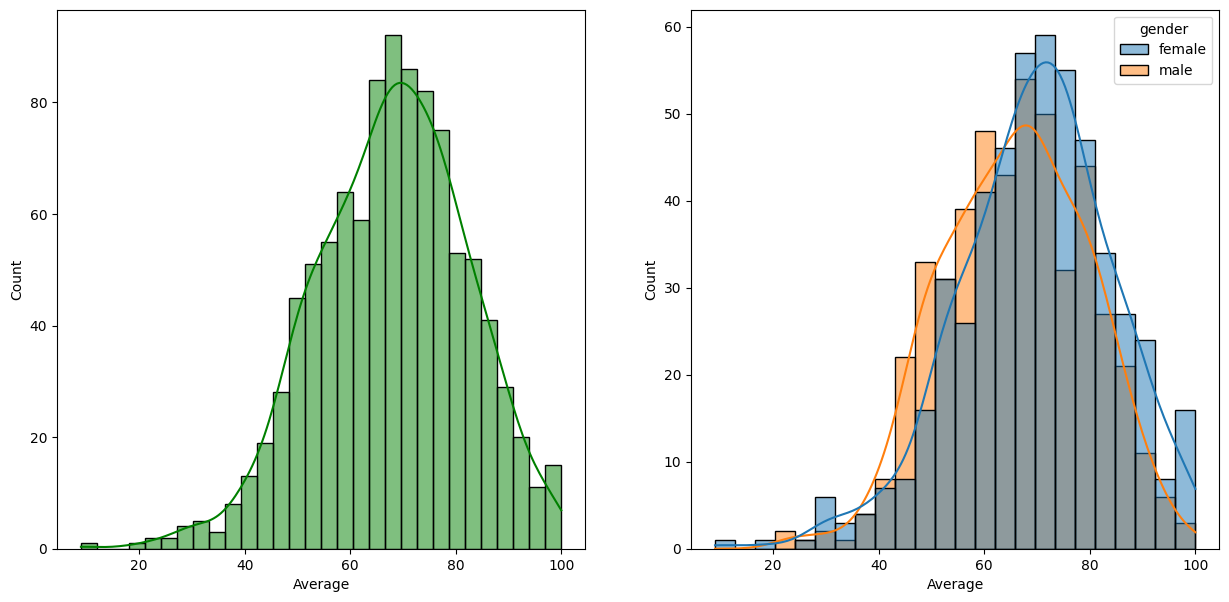

In [15]:
fig, axs = plt.subplots(1,2,figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Average',kde=True,hue='gender')
plt.show()

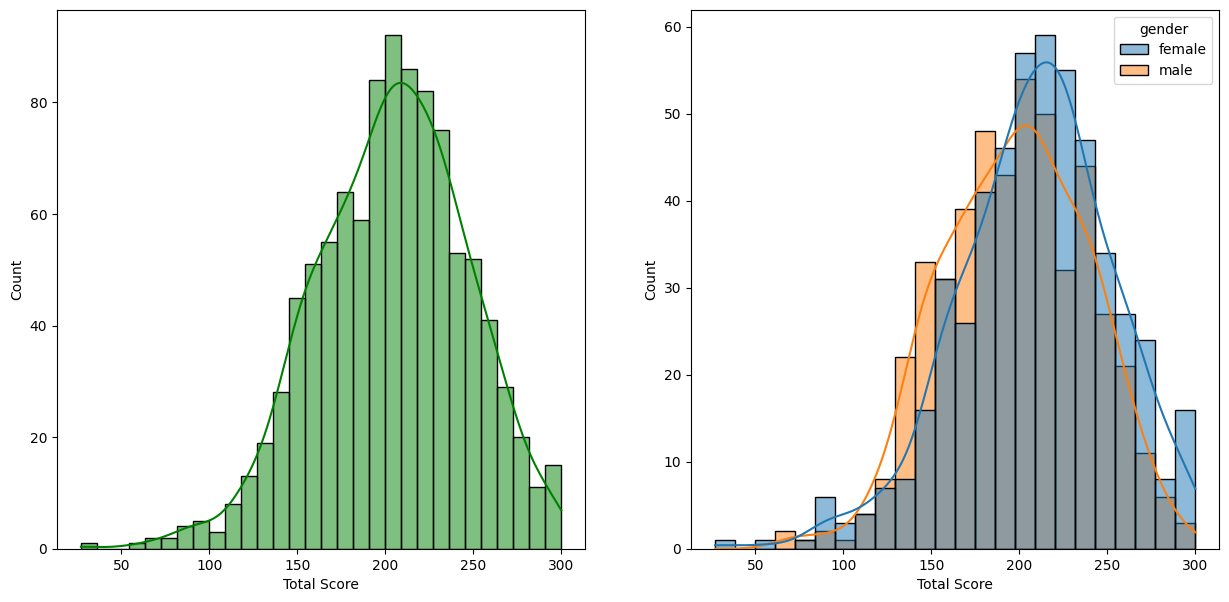

In [16]:
fig, axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='Total Score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Total Score',kde=True,hue='gender')
plt.show()

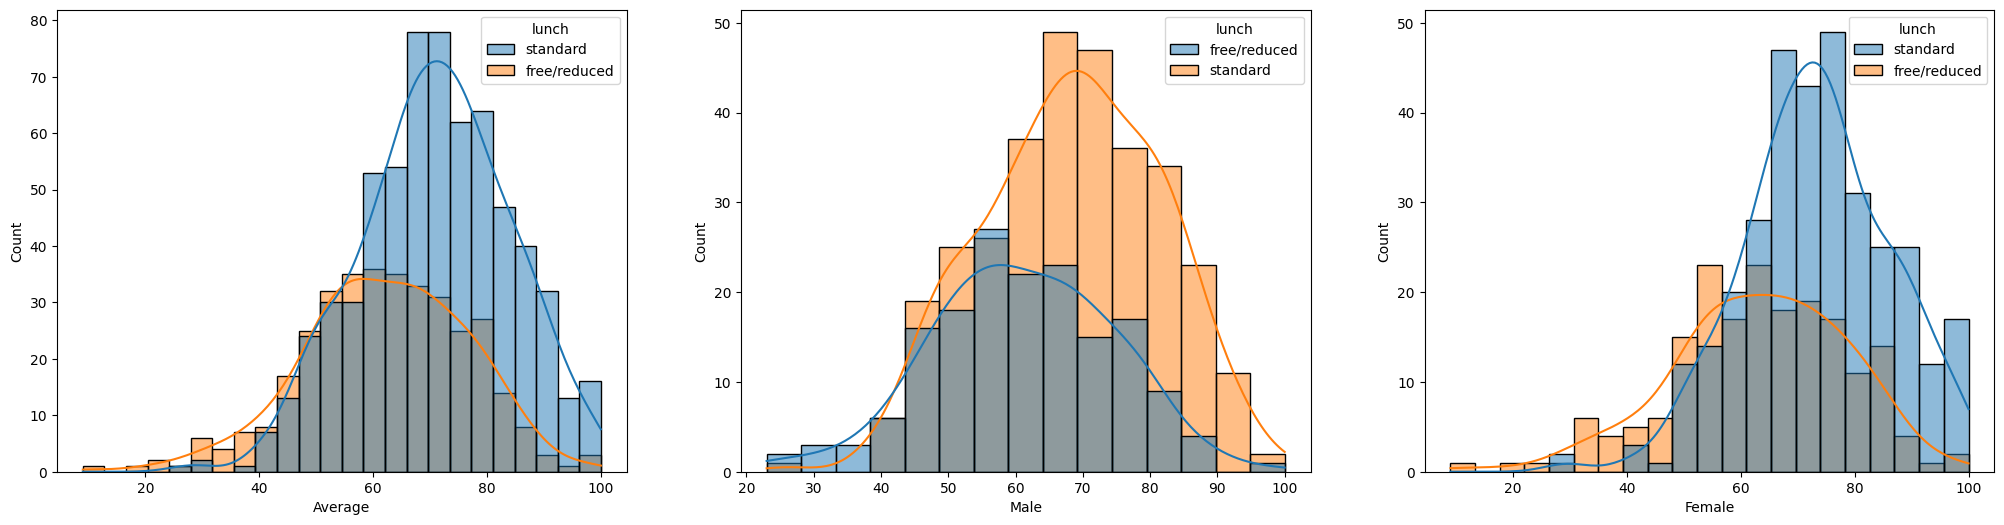

In [17]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='Average',kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='lunch')
plt.xlabel('Male')
plt.subplot(133)
sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='lunch')
plt.xlabel('Female')
plt.show()

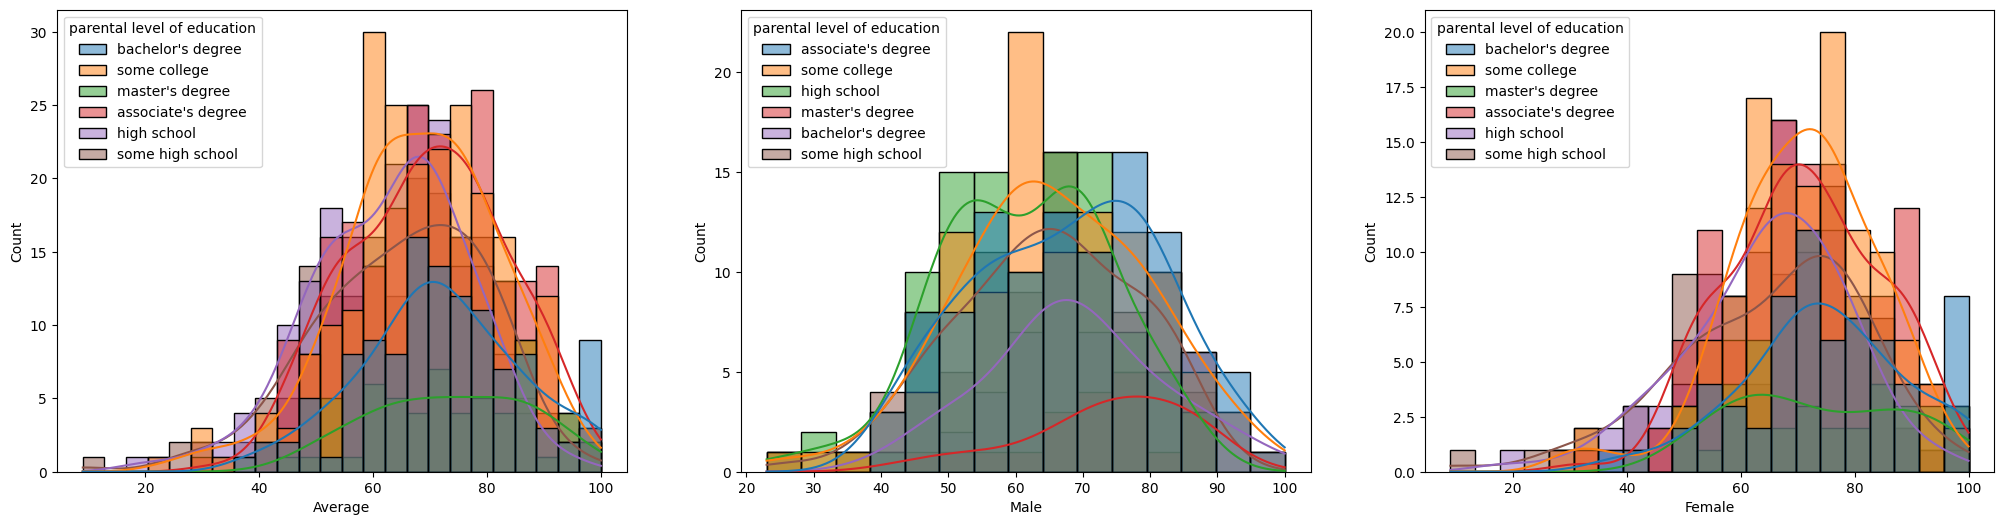

In [18]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='Average',kde=True,hue='parental level of education')
plt.subplot(132)
sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='parental level of education')
plt.xlabel('Male')
plt.subplot(133)
sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='parental level of education')
plt.xlabel('Female')
plt.show()

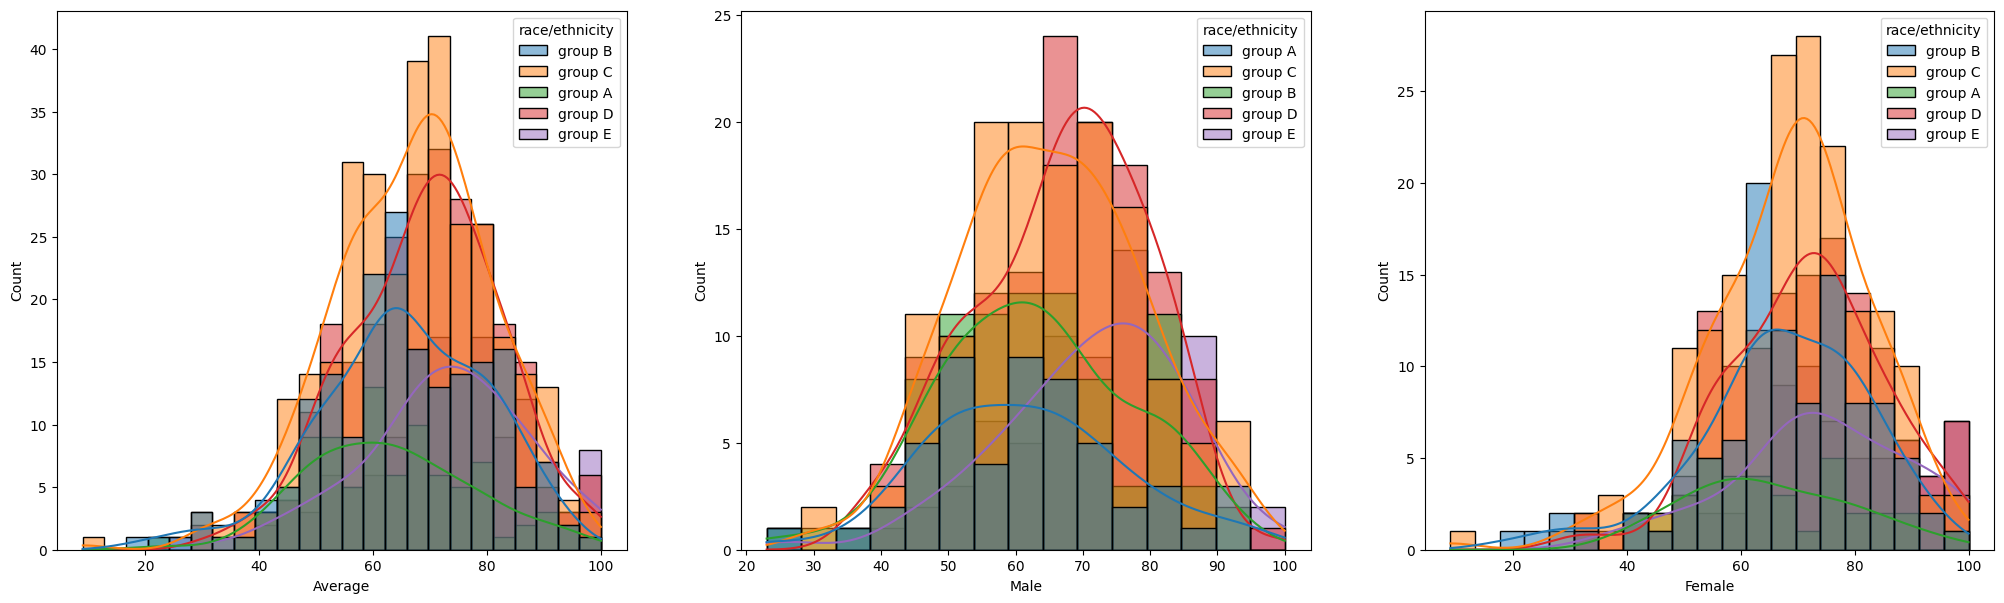

In [19]:
plt.subplots(1,3,figsize=(25,7))
plt.subplot(131)
sns.histplot(data=df,x='Average',kde=True,hue='race/ethnicity')
plt.subplot(132)
sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='race/ethnicity')
plt.xlabel('Male')
plt.subplot(133)
sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='race/ethnicity')
plt.xlabel('Female')
plt.show()

Maximum Score of Students in all three subjects

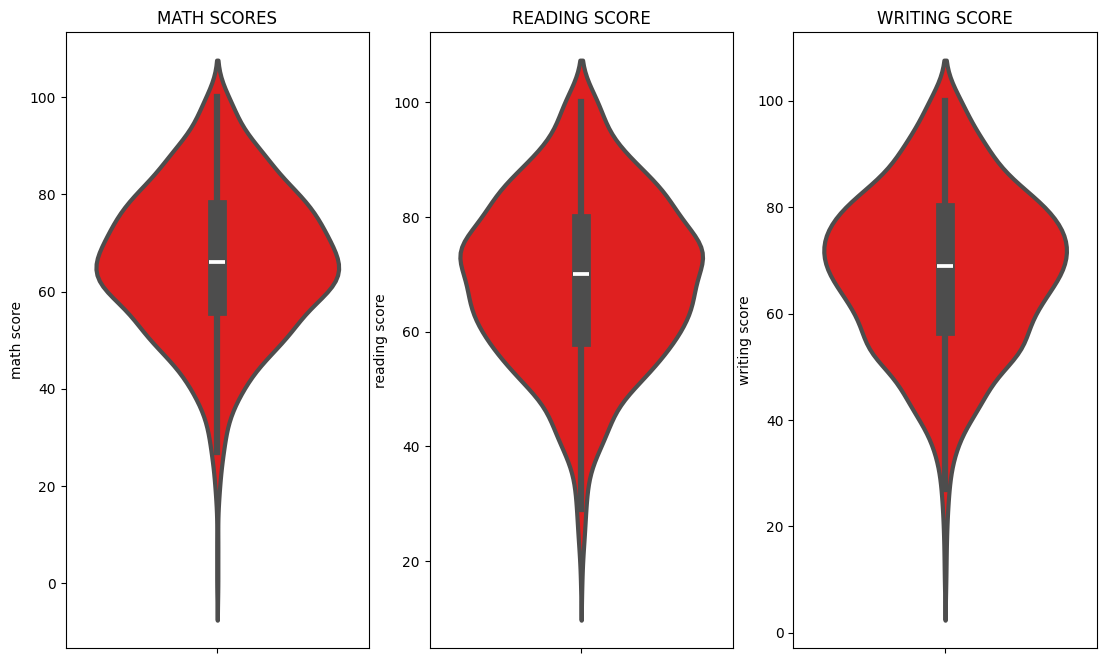

In [30]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1,4,2)
plt.title('READING SCORE')
sns.violinplot(y='reading score',data=df,color='red',linewidth=3)
plt.subplot(1,4,3)
plt.title('WRITING SCORE')
sns.violinplot(y='writing score',data=df,color='red',linewidth=3)
plt.show()


Multivariate Analysis using pieplot

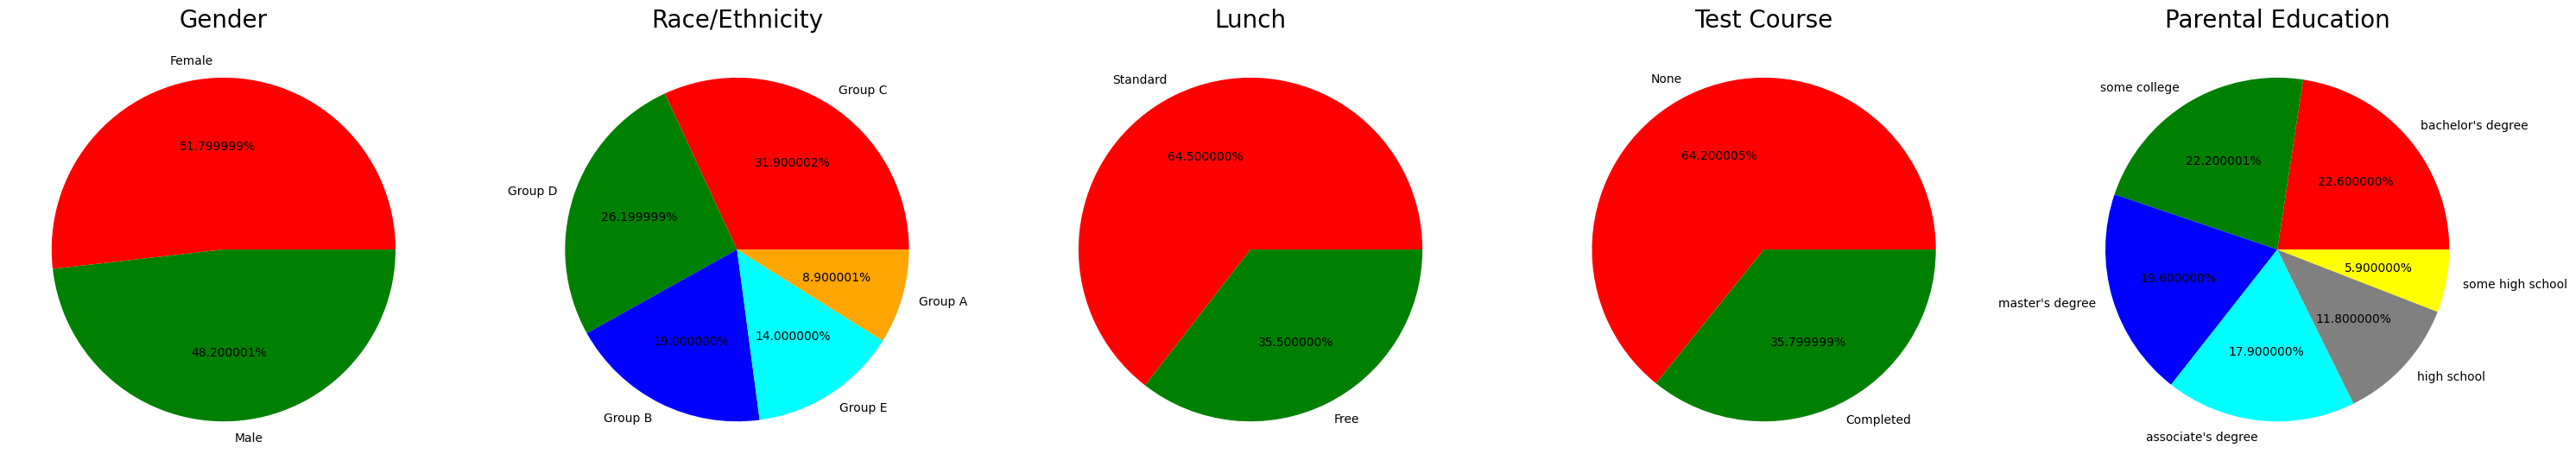

In [37]:
plt.rcParams['figure.figsize']=(30,12)
plt.subplot(1,5,1)
size = df['gender'].value_counts()
labels='Female','Male'
color=['red','green']

plt.pie(size,colors=color,labels=labels,autopct= '%2f%%')
plt.title('Gender',fontsize=20)
plt.axis('off')


plt.subplot(1,5,2)
size=df['race/ethnicity'].value_counts()
labels='Group C','Group D','Group B','Group E','Group A'
color=['red','green','blue','cyan','orange']

plt.pie(size,colors=color,labels=labels,autopct= '%2f%%')
plt.title('Race/Ethnicity',fontsize=20)
plt.axis('off')


plt.subplot(1,5,3)
size=df['lunch'].value_counts()
labels='Standard','Free'
color=['red','green']

plt.pie(size,colors=color,labels=labels,autopct= '%2f%%')
plt.title('Lunch',fontsize=20)
plt.axis('off')


plt.subplot(1,5,4)
size=df['test preparation course'].value_counts()
labels='None','Completed'
color=['red','green']

plt.pie(size,colors=color,labels=labels,autopct= '%2f%%')
plt.title('Test Course',fontsize=20)
plt.axis('off')



plt.subplot(1,5,5)
size=df['parental level of education'].value_counts()
labels="bachelor's degree",'some college',"master's degree","associate's degree",'high school','some high school'
color=['red','green','blue','cyan','grey','yellow']

plt.pie(size,colors=color,labels=list(labels),autopct='%2f%%')
plt.title('Parental Education',fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.grid()
plt.show()

Feature Wise Visualization

Univariate Analysis(How is distribution of Gender?)

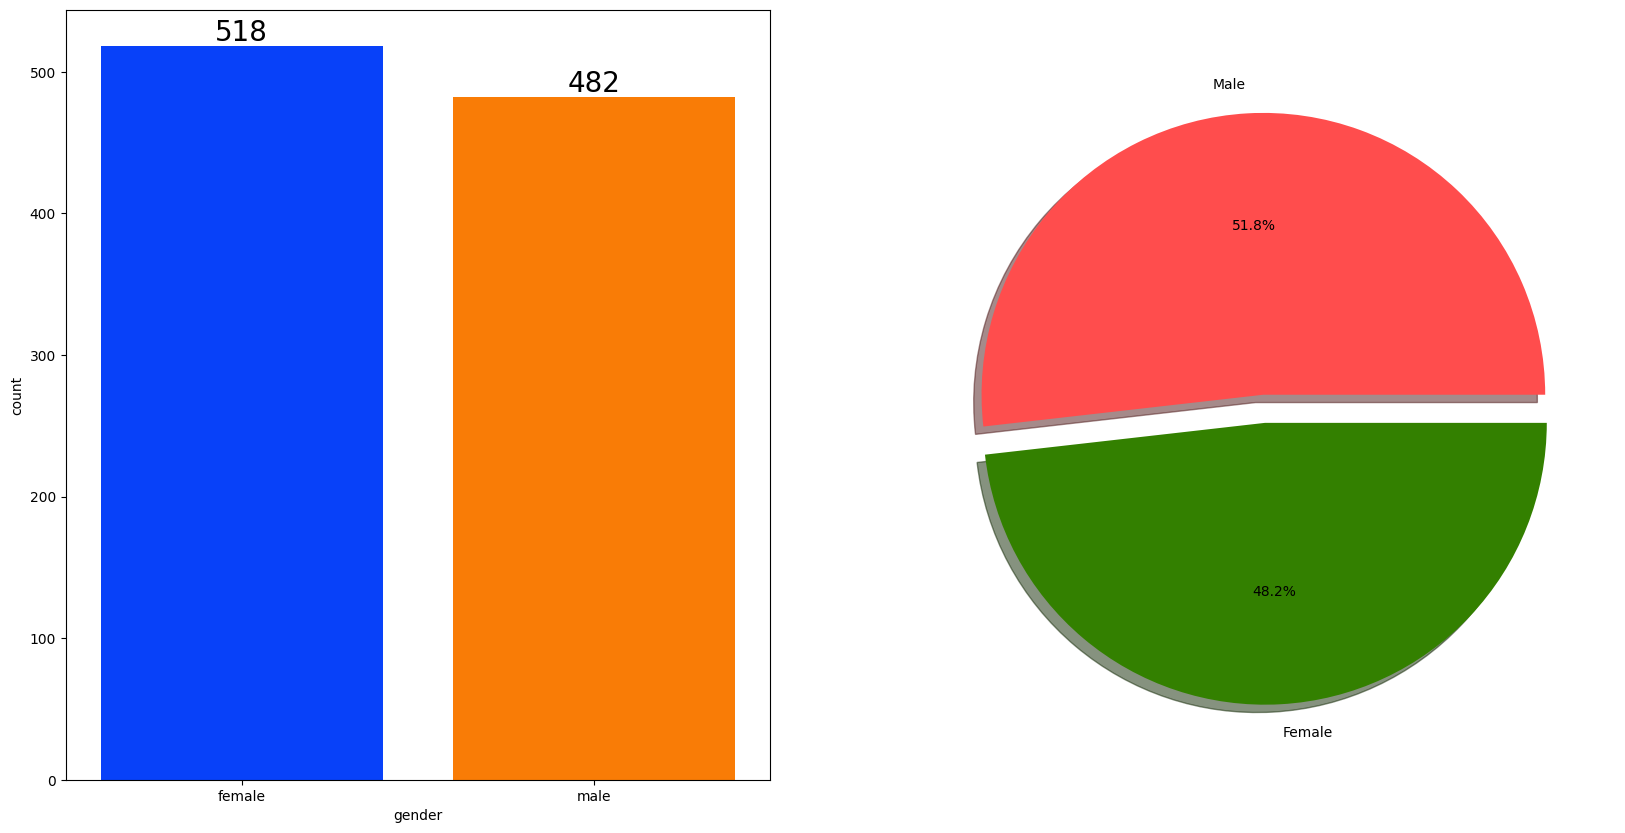

In [41]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#338000'])
plt.show()

BIVARIATE ANALYSIS(is gender has any impact on students performance ?)

In [47]:
gender_group=df.groupby('gender').mean(numeric_only=True)
gender_group


,math score,reading score,writing score,Total Score,Average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


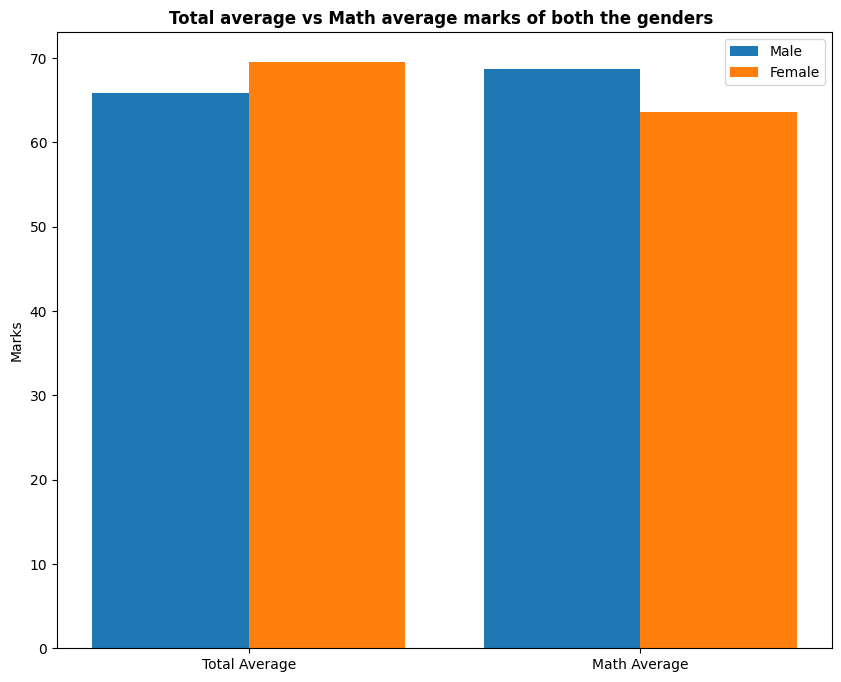

In [48]:
plt.figure(figsize=(10,8))
x=['Total Average','Math Average']

female_scores= [gender_group['Average'][0],gender_group['math score'][0]]
male_scores=[gender_group['Average'][1],gender_group['math score'][1]]

x_axis = np.arange(len(x))

plt.bar(x_axis-0.2,male_scores,0.4,label='Male')
plt.bar(x_axis+0.2,female_scores,0.4,label='Female')


plt.xticks(x_axis,x)
plt.ylabel('Marks')
plt.title("Total average vs Math average marks of both the genders ", fontweight='bold')
plt.legend()
plt.show()